In [44]:
# Импорт необходимых модулей 
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Настройки для визуализации
# Если используется темная тема - лучше текст сделать белым
TEXT_COLOR = 'black'

matplotlib.rcParams['figure.figsize'] = (15, 10)
matplotlib.rcParams['text.color'] = 'black'
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['axes.labelcolor'] = TEXT_COLOR
matplotlib.rcParams['xtick.color'] = TEXT_COLOR
matplotlib.rcParams['ytick.color'] = TEXT_COLOR

# Зафиксируем состояние случайных чисел
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

In [45]:
URL = 'https://raw.githubusercontent.com/KaiL4eK/ml_edu/master/datasets/Titanic_train.csv'
src_df = pd.read_csv(URL)
src_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
print(f'Shape of data: {src_df.shape}')
print(src_df.columns)

Shape of data: (891, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [47]:
src_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Анализ признаков

In [48]:
print(src_df['PassengerId'].nunique())
print(src_df['PassengerId'].count())
src_df['PassengerId'].head()

891
891


0    1
1    2
2    3
3    4
4    5
Name: PassengerId, dtype: int64

In [49]:
src_df['Name'].describe()

count                     891
unique                    891
top       Novel, Mr. Mansouer
freq                        1
Name: Name, dtype: object

Вывод: самым первым этапом базового анализа является анализ признаков, который проводится по каждому признаку с целью определить применимость, необходимость коррекции и другие особенности и проблемы.

# Заполнение пропусков

In [7]:
src_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

По результатам отображения количества пропусков видно, что данные имеют пропуски и требуется произвести их обработку, так как данные в таком виде не могут быть применены для построения модели.

Существует огромное количество возможных вариантов работы с пропусками (https://scikit-learn.org/stable/modules/impute.html):

Исключение признаков (колонок), имеющих пропуски;
Исключение записей (строк), имеющих пропуски;
Заполнение пропусков средним/медианным значением признака (Унивариативное заполнение - Используется единственный признак);
Заполнение пропусков наиболее частым значением признака (мода);
Заполнение путем построения регрессионной модели по остальным признакам (Мультивариативное заполнение - используется несколько признаков);
и т.д.
Так, например, признак Age имеет 177 пропущенных значений, что является достаточно большим количеством, чтобы исключить записи с пропусками. Признак также невозможно исключить, так как он имеет информативный характер (возраст часто связывают со способностью к выживанию). Таким образом, можно воспользоваться sklearn.impute.SimpleImputer со стратегией заполнения mean, чтобы заполнить пропущенные данные на основе статистики остальных данных данного признака.

In [8]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='mean')
# Двойные скобки использованы, чтобы передать в fit() 2D массив
X_in = src_df[['Age']]
print(X_in.shape)

src_df['Age'] = imp.fit_transform(X_in)
src_df.isnull().sum()

(891, 1)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
imp = SimpleImputer(strategy='most_frequent')
src_df['Embarked'] = imp.fit_transform(src_df[['Embarked']])

src_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [10]:
src_df['Cabin'].isnull().sum()/src_df.shape[0]

0.7710437710437711

77% - это слишком большое количество пропусков, чтобы пытаться заполнить!


# Кодирование признаков

С категориальными часто бывает чуть сложнее. Наибольшую проблему составляют признаки, которые представлены строками, например признак Embarked:

In [11]:
src_df.info()
src_df['Embarked'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


S    646
C    168
Q     77
Name: Embarked, dtype: int64

Этот признак представлен в данных типом object - строка, при этом мы видим, что уникальных значений мало, а это наводит на мысль, что признак - категориальный. Теперь важно понять, имеют ли значения порядок или они независимы? В данном случае логично предположить, что независимы, поэтому присваиваем тип - категориальные номинальный.

Но мало просто присвоить тип, нам же нужно подготовить данные для модели, а значит как-то представить в численном виде эти строки.

Для этого нам может помочь кодирование One-Hot! Давайте посмотрим, как это делается в sklearn:

In [12]:
from sklearn.preprocessing import OneHotEncoder

# Мы отключим создание разреженного представления, но оно оптимальнее для хранения
# Поэтому для отладки лучше использовать и проверять dense представление,
#   а для работы в конечном представлении - sparse
oh_enc = OneHotEncoder(sparse=False)

# Любой энкодер ненавидит пропуски в данных, поэтому перед использованием
#   заполните пропуски в данных
X_sample = src_df[['Embarked']]
print(X_sample.shape)

oh_enc.fit(X_sample)

(891, 1)


OneHotEncoder(sparse=False)

In [13]:
# Можно проверить, какие есть категории
oh_enc.categories_

[array(['C', 'Q', 'S'], dtype=object)]

In [14]:
# Также посмотреть, что происходит после кодирования с данными
X_sample_ohe = oh_enc.transform(X_sample)

print(X_sample[:6])
print(X_sample_ohe[:6])

  Embarked
0        S
1        C
2        S
3        S
4        S
5        Q
[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]]


Еще одним важным аргументом является поведение энкодера при поступлении новых данных, которые он раньше не видел. Тут многое зависит от задачи, но можно сделать так, чтобы он выдавал ошибку или игнорировал новую категорию, которая не была в обучающих данных:

In [15]:
# Кидаем исключение, если появилась ранее невиданная категория
oh_enc = OneHotEncoder(sparse=False, handle_unknown='error')
oh_enc.fit(src_df[['Embarked']])

# Воспользуемся try-except, чтобы поймать ошибку
try:
    print(oh_enc.transform(np.array([['K']])))
except Exception as e:
    print(f'Error happened: {e}')

Error happened: Found unknown categories ['K'] in column 0 during transform


In [16]:
# Или просто игнорируем
oh_enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
oh_enc.fit(src_df[['Embarked']])

# Воспользуемся try-except, чтобы поймать ошибку
try:
    print(oh_enc.transform(np.array([['K']])))
except Exception as e:
    print(f'Error happened: {e}')

[[0. 0. 0.]]


Первый способ (ошибка) - удобен для проверки, что данные соответсвуют формату и все происходит так как надо - жесткая логика.
Второй вариант (игнорировать) - более мягкая, но тут надо учитывать, что при обучении модель должна уметь обрабатывать ранее невиданные данные. Такой способ удобен, когда мы сами задаем список категорий:

In [17]:
# Или просто игнорируем
oh_enc = OneHotEncoder(sparse=False, handle_unknown='ignore', categories=[['C', 'Q']])
X_sample = src_df[['Embarked']]
oh_enc.fit(X_sample)

X_sample_ohe = oh_enc.transform(X_sample)

print(X_sample[:6])
print(X_sample_ohe[:6])

  Embarked
0        S
1        C
2        S
3        S
4        S
5        Q
[[0. 0.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]]


# Полноценная предобработка

Когда мы разобрались с тем, как нужно обработать признаки,Мы пойдем вторым способом и познакомимся с двумя полезными инструментами: Pipeline и ColumnTransformer.

Пайплайн позволяет собирать несколько этапов обработки/моделей воедино, чтобы затем пользоваться им как единым целым! Для примера наша обработка категориальных признаков может состоять из двух этапов:

In [50]:
from sklearn.pipeline import Pipeline

categorical_features = ['Sex', 'Embarked']

# Создаем обработчик категориальный признаков
# Так как имеются пропущенные данные в Embarked - 
#   создадим Pipeline для выполнения нескольких шагов
categorical_transformer = Pipeline(
    # Шаги в Pipeline указываются как кортежи, каждый из которых
    #   представляет собой (имя шага, трансформер)
    steps=[
        ('imp', SimpleImputer(strategy='most_frequent')),
        # Опять sparse для отладки = False
        ('enc', OneHotEncoder(sparse=False, handle_unknown='error')),                   
])

In [51]:
URL = 'https://raw.githubusercontent.com/KaiL4eK/ml_edu/master/datasets/Titanic_train.csv'
df = pd.read_csv(URL)

categorical_transformer.fit(df[categorical_features])

X_transformed = categorical_transformer.transform(df[categorical_features])
print(df[categorical_features][:3])
print(X_transformed[:3])

      Sex Embarked
0    male        S
1  female        C
2  female        S
[[0. 1. 0. 0. 1.]
 [1. 0. 1. 0. 0.]
 [1. 0. 0. 0. 1.]]


In [52]:
# До конкретных шагов можно добраться через атрибут named_steps
categorical_transformer.named_steps['enc'].categories_

[array(['female', 'male'], dtype=object), array(['C', 'Q', 'S'], dtype=object)]

In [53]:
# Или посмотреть названия признаков после кодирования
categorical_transformer.named_steps['enc'].get_feature_names(categorical_features)

array(['Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype=object)

Теперь перейдем к другому классу - преобразователь колонок! Его применение в том, чтобы также собирать шаги обработки, но уже указывая, на какие колонки, какая обработка. То есть в пайплайн мы явно передавали данные. ColumnTransformer позволяет настроить всю линию предобработки, указывая, какую колонку, чем обрабатывать:

In [54]:
from sklearn.compose import ColumnTransformer

# Составляет список признаков для обработки
categorical_features = ['Sex', 'Embarked']
numeric_features = ['Age', 'Fare']

# Создаем обработчик категориальных признаков
categorical_transformer = Pipeline(
    steps=[
        ('imp', SimpleImputer(strategy='most_frequent')),
        ('enc', OneHotEncoder(handle_unknown='error')),                   
])

# Численные значения имеют пропуски, заполним стратегией медианы
numeric_transformer = SimpleImputer(strategy='median')

# Создаем конечный конвертер, который будет использован для 
#   предобработки
preprocessor = ColumnTransformer(
    # Список конвертеров, каждый кортеж содержит
    #   имя, конвертер и признаки, на которые он будет применен
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)
    ],
    # Признаки, не указанные ни в одном из конвертеров будут удалены
    remainder='drop'
)

preprocessor.fit(df)

X_data = preprocessor.transform(df)
print(type(X_data))

<class 'numpy.ndarray'>


На выходе конвертера получается числовая матрица numpy, которую можно уже передавать на вход модели. При этом трансформер колонок позволяет также получать доступ до своих составляющих через атрибут named_transformers_:



In [56]:
# Получим объект пайплайна категориальных признаков
pipe = preprocessor.named_transformers_['cat']
# Отобразим категории OHE для шага кодирования
print(pipe.named_steps['enc'].categories_)

[array(['female', 'male'], dtype=object), array(['C', 'Q', 'S'], dtype=object)]


In [57]:
# Для того, чтобы получить имена признаков, воспользуемся функцией
#   OneHotEncoder.get_feature_names()
# Чтобы ею воспользоваться, необходимо добраться до объекта через атрибуты
#   - ColumnTransformer.named_transformers_ + ключ имени
#   - Pipeline.named_steps + ключ шага
ohe_column_names = preprocessor \
    .named_transformers_['cat'] \
    .named_steps['enc'] \
    .get_feature_names(categorical_features)

recovered_feat_names = \
    list(ohe_column_names) + \
    list(numeric_features)

df_enc = pd.DataFrame(X_data, columns=recovered_feat_names)

df_enc.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age,Fare
0,0.0,1.0,0.0,0.0,1.0,22.0,7.2500
1,1.0,0.0,1.0,0.0,0.0,38.0,71.2833
2,1.0,0.0,0.0,0.0,1.0,26.0,7.9250
3,1.0,0.0,0.0,0.0,1.0,35.0,53.1000
4,0.0,1.0,0.0,0.0,1.0,35.0,8.0500


In [58]:
# Для сравнения выведем исходные данные
df[categorical_features + numeric_features].head()

,Sex,Embarked,Age,Fare
0,male,S,22.0,7.2500
1,female,C,38.0,71.2833
2,female,S,26.0,7.9250
3,female,S,35.0,53.1000
4,male,S,35.0,8.0500


Сутью данного инструмента является сбор инструментов обработки в единый объект уже после этапа поиска подходящих инструментов!

Аналогично, нынешний объект preprocessor можно разместить внутрь пайплайна вместе с моделью предсказания!

# Разработка модели случайного леса

# Для примера обучим решающее дерево для задачи XOR.

[Text(418.5, 453.0, 'X[0] <= 0.5\ngini = 0.5\nsamples = 4\nvalue = [2, 2]\nclass = 0'),
 Text(209.25, 271.8, 'X[1] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = 0'),
 Text(104.625, 90.59999999999997, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0'),
 Text(313.875, 90.59999999999997, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1'),
 Text(627.75, 271.8, 'X[1] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = 0'),
 Text(523.125, 90.59999999999997, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1'),
 Text(732.375, 90.59999999999997, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0')]

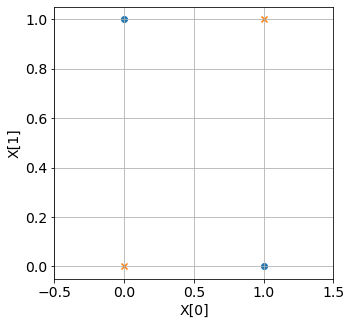

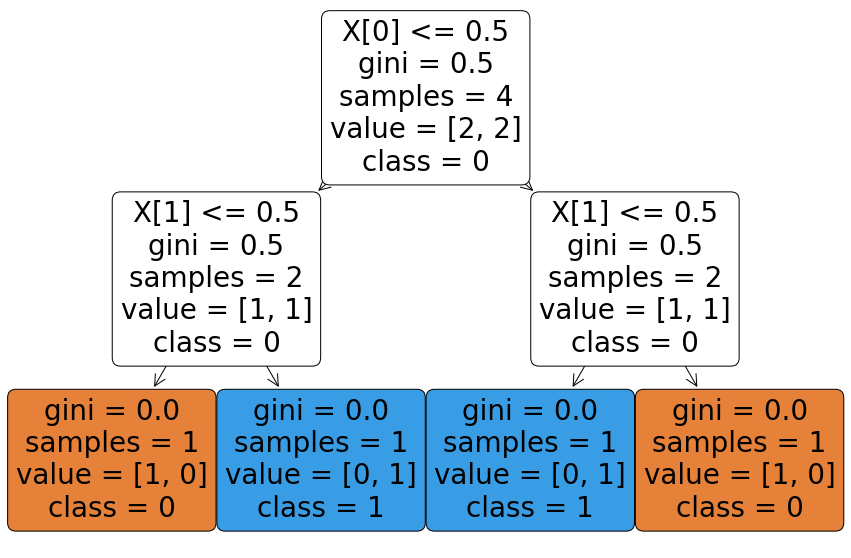

In [59]:
import numpy as np

# Пример решающего дерева на основе задачи XOR
X = np.array([
     [1, 1],
     [1, 0],
     [0, 1],
     [0, 0]
])

y = np.array([
     0,
     1,
     1,
     0
])

plt.figure(figsize=[5,5])
plt.scatter(X[y==1, 0], X[y==1, 1], marker='o')
plt.scatter(X[y==0, 0], X[y==0, 1], marker='x')
plt.xlabel('X[0]')
plt.ylabel('X[1]')
plt.xlim([-0.5, 1.5])
plt.grid()

from sklearn.tree import DecisionTreeClassifier, plot_tree

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X, y)

plt.figure()
plot_tree(tree, filled=True, rounded=True, impurity=True, class_names=['0', '1'])

На рисунке представлена визуализация обученного дерева решения для нелинейной задачи XOR. Как видно, каждый узел определяет порог признака, так решение сходится до листьев, в котором и определяется конечное решение дерева (предсказанный класс).

Случайный лес работает по принципу набора таких деревьев:

Обучение деревьев происходит на основе алгоритма построения дерева (один из них - CART ~ Classification and regression trees). Построение происходит по принципу поиска наилучших разделений пространства на основе одного из признаков для создания узла и дальнейшего роста.

Одной из важных особенностей случайного леса является то, что для обучения каждое дерево из леса получает не полную выборку, а лишь подвыборку из всей обучающей выборки. Такой принцип назван Bagging.

Деревья сами по себе очень чувствительны ко входным данным, так как могут бесконечно создавать узлы по признакам, чтобы максимально точно разделить классы. По факту, дерево очень легко переобучается на тех данных, которые даны для обучения (построения), если не ограничить глубину дерева.

Поэтому при построении каждого малого дерева используется подвыборка, куда могут попадать с повторениями случайные записи из данных со случайными признаками. Таким образом, каждая модель будет видеть лишь часть данных, при этом отдельно каждая слабая модель будет работать плохо, но в совокупности все модели будут давать более точную среднюю оценку в соответсвии с принятием решения по большинству голосов.

In [27]:
from sklearn.model_selection import train_test_split

TRAIN_RATIO = 0.8

y_data = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data, 
    train_size=TRAIN_RATIO, 
    random_state=RANDOM_STATE,
    stratify=y_data
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(712, 7) (712,)
(179, 7) (179,)


In [28]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

# Важность признаков

Обучение модели случайного леса позволяет получить оценку важности признаков! Для работы с показателями важности признаков достаточно воспользоваться атрибутом RandomForestClassifier.feature_importances_:

Feature: Sex_female | 0.15224129686733381
Feature: Sex_male | 0.14384419737286344
Feature: Embarked_C | 0.011105298934466924
Feature: Embarked_Q | 0.004819245681205841
Feature: Embarked_S | 0.013524060985120172
Feature: Age | 0.2941428805908806
Feature: Fare | 0.3803230195681293


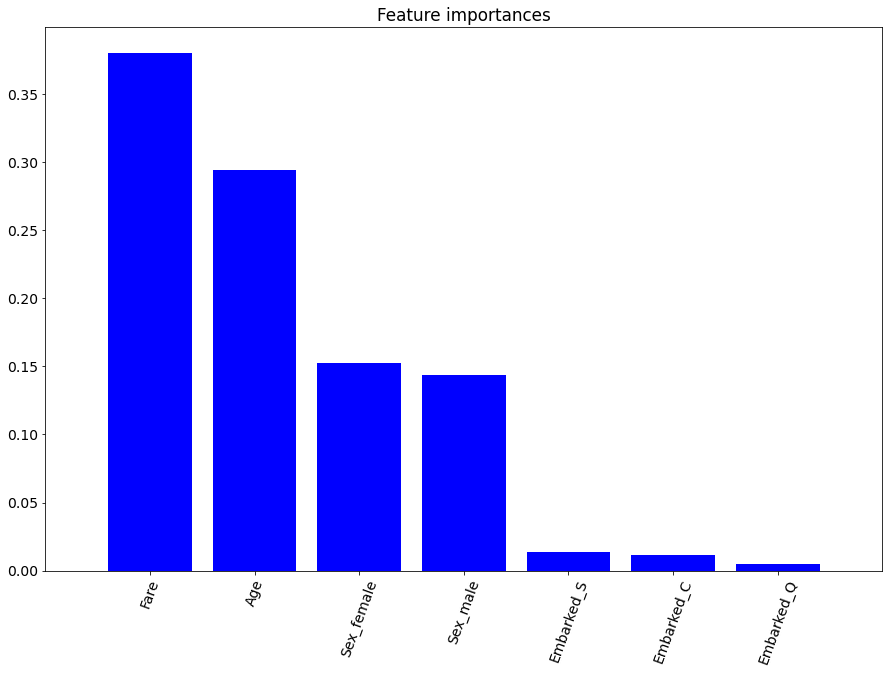

In [29]:
def show_importance(model, feature_names, X):
    importances = model.feature_importances_
    for feat_imp, feat_name in zip(importances, feature_names):
        print(f'Feature: {feat_name} | {feat_imp}')

    indices = np.argsort(importances)[::-1]
    sorted_feat_names = [feature_names[ind] for ind in indices]

    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices], color="b", align="center")
    plt.xticks(range(X.shape[1]), sorted_feat_names, rotation=70)
    plt.xlim([-1, X.shape[1]])
    plt.show()

show_importance(rf_clf, recovered_feat_names, X_train)

Такой график показывает, как признаки влияли на построение деревьев и насколько каждый из них важен по отношению к другим.


# Расширенный анализ данных

Результаты построения baseline модели как правило позволяют оценить результаты, которые можно получить наиболее быстрым способом. Дальнейших улучшений можно добиться как настраиванием модели и усложнением алгоритма, так и поиском "инсайтов" в данных, что позволит модели более просто понимать зависимости и принимать правильные решения. Для расширения знаний и подходов предлагаю ознакомиться с хорошей статьей по EDA, а мы рассмотрим несколько основных способов проанализировать данные и сделать выводы.

# Больше графиков

Один из самых простых способов проверить пользу признака - анализ нескольких признаков в совокупности, чтобы понять, какие взаимосвязи имеются и дает ли признак информацию. Начнем с того, что постараемся определить, кто чаще выживает - мужчины или женщины:

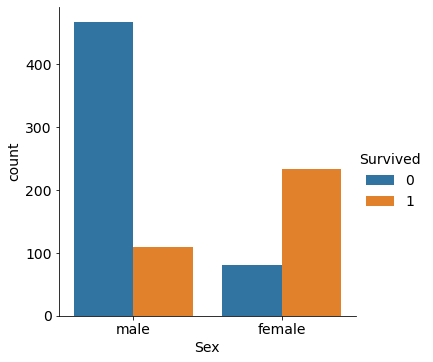

In [30]:
sns.catplot(x="Sex", hue="Survived", kind="count", data=df)

Ответ на графике - выживаемость (Survived = 1) у женского пола больше, что означает необходимость использвания данного признака, так как он влияет на конечное решение! Если бы графики были ровные (все на одном уровне), мы бы не могли по полу человека сказать, кто скорее всего выживет, а значит такой признак бесполезен!

Еще одним интересный признак Pclass, класс обслуживания, можно проверить, влияет ли он на выживаемость:

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

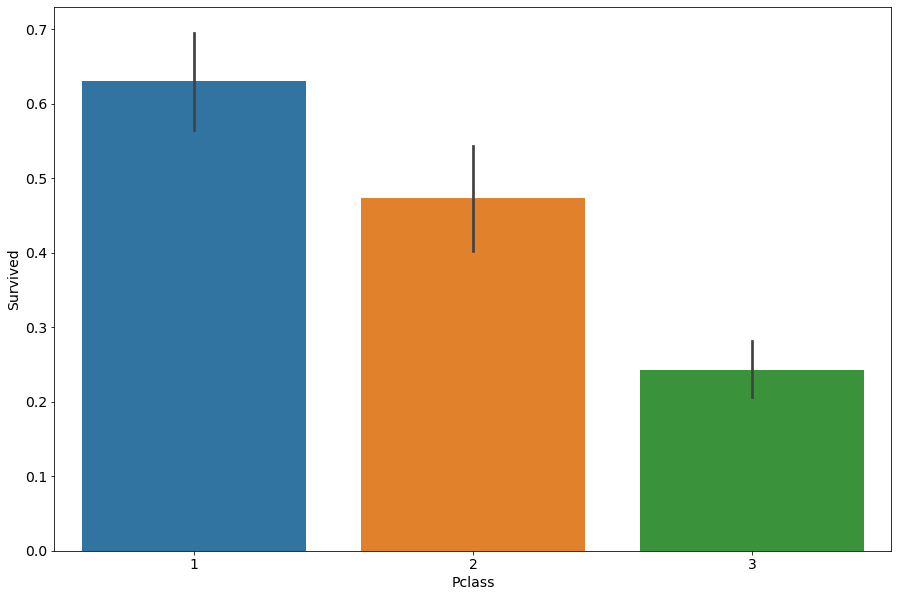

In [31]:
sns.barplot(x='Pclass', y='Survived', data=df)

Как видно, класс тоже вносит свое влияние в выживаемость: обслуживание первого класса более склонно к выживанию.

Также можно влияние признака проверить отображением через sns.FacetGrid, чтобы проверить все значения, связанные с несколькими признаками:

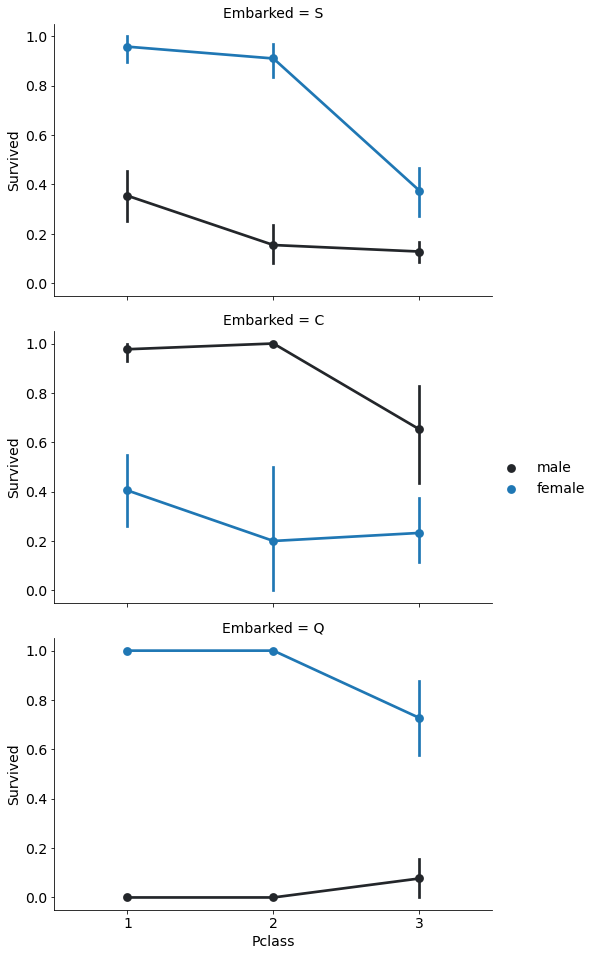

In [32]:
FacetGrid = sns.FacetGrid(df, row='Embarked', height=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None)
FacetGrid.add_legend()

Как видно, в зависимости от порта посадки, а одних случаях (порты Q и S) женский пол имеет большие шансы на выживание, чего не скажешь о порте C. Тоже свой вклад в предсказания.

# Создание новых признаков

Помимо исключения признаков одним из широкоприменяемых подходов является создание новых признаков. Для примера, наличие двух признаков SibSp и Parch сообщает информацию о количестве родственников на борту. Таким образом, можно сформировать дополнительный признак FamilySize.

In [33]:
# +1 - we are in family too
df['FamilySize'] = df['Parch'] + df['SibSp'] + 1

Для примера после того, как мы создали свой признак "размер семьи", то можно отобразить единый график шансов выживания:

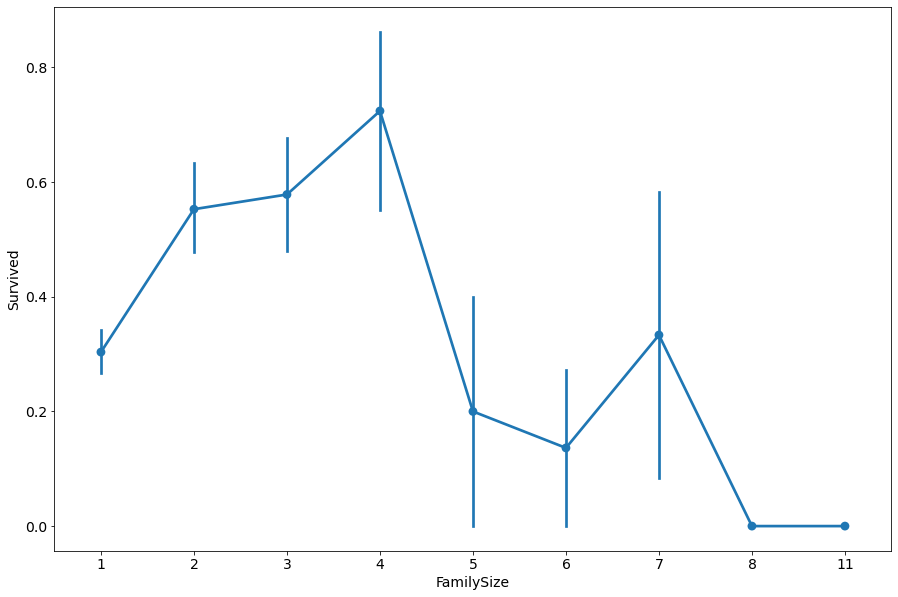

In [34]:
axes = sns.pointplot(x='FamilySize', y='Survived', data=df)

По такому графику можем видеть, что в зависимости от количества членов семьи меняются и шансы на выживание, при этом есть некоторая "критическая точка", что в четыре человека выжить больше шансов, нежели дальнейшее увеличение количества людей в семье на борту.

# Группировка данных (binning)

Одним из способов предобработки данных является группировка численные признаков для формирования категориального признака. Суть подхода в том, чтобы заменить непрерывное значение группами, каждая из которых описывает диапазон значений. Таким образом численное значение заменяется категориальным последовательным.

Такой подход является с одной стороны методом регуляризации, так как модель учится не на точных значениях, а на группах значений. С другой стороны, такой подход теряет часть информации.

Для примера разберем признак Fare:

E:\jupytttt\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

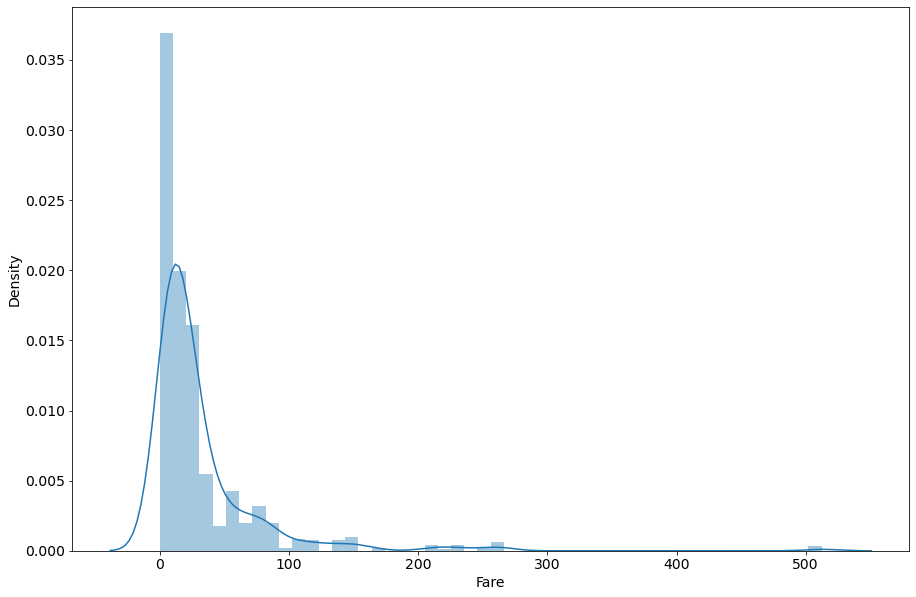

In [35]:
sns.distplot(df['Fare'], bins=50)

Раcпределение немного сдвинуто влево, также слева имеется небольшая мода. Для группировки воспользуется классом KBinsDiscretizer, который разделяет весь диапазон на заданное количество групп (бинов).

[array([  0.    ,   7.55  ,   7.8542,   8.05  ,  10.5   ,  14.4542,
        21.6792,  27.    ,  39.6875,  77.9583, 512.3292])]


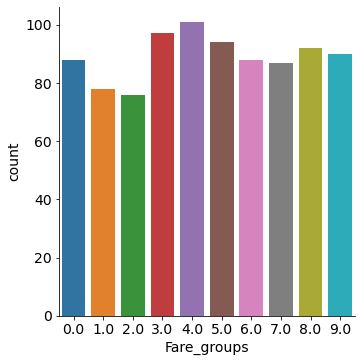

In [36]:
from sklearn.preprocessing import KBinsDiscretizer

discr = KBinsDiscretizer(
    # Количество бинов    
    n_bins=10,
    # Способ кодирования - порядковый
    encode='ordinal',
)

# Двойные скобки для передачи DataFrame (2D данные)
df['Fare_groups'] = discr.fit_transform(df[['Fare']])
# Отобразим границы бинов
print(discr.bin_edges_)

sns.catplot(x='Fare_groups', kind="count", data=df)

Группировка, как видно, привела сильно смещенное влево распределение к равномерному.

Более того, теперь мы можем визуально представить зависимость выживаемости от стоимости билета:

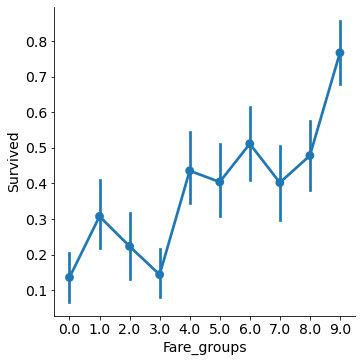

In [37]:
sns.catplot(x='Fare_groups', y='Survived', data=df, kind='point')

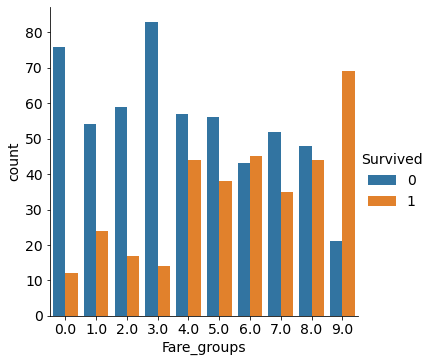

In [38]:
sns.catplot(x='Fare_groups', hue='Survived', data=df, kind='count')

# Поиск гиперпараметров

В качестве реализации воспользуемся классом sklearn.model_selection.GridSearchCV, который реализует GridSearch с кросс-валидацией.

In [39]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'max_depth': [1, 2, 4, 5, 7],
    'n_estimators': [1, 5, 10, 20, 40],
}

grid_search = GridSearchCV(
    # модель
    estimator=rf_clf,                   
    # сетка параметров
    #   может быть объектом dict 
    #   или list с несколькими dict внутри (несколько сеток)
    param_grid=parameters,              
    # кол-во фолдов для CV
    cv=5,                               
    # метрика для оценки - используем F1 
    scoring='f1_macro',   
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 4, 5, 7],
                         'n_estimators': [1, 5, 10, 20, 40]},
             scoring='f1_macro')

In [40]:
# Для поиска параметров модели внутри пайплайна используется специальное именование:
#   <название шага>__<название параметра>
pipe = Pipeline(steps=[
    ('clf', RandomForestClassifier()),
])

# В названии два подчеркивания!
parameters = {
    'clf__max_depth': [1, 2, 4, 5, 7],
    'clf__n_estimators': [1, 5, 10, 20, 40],
}

grid_search = GridSearchCV(
    # пайплайн
    estimator=pipe,                   
    param_grid=parameters,              
    cv=5,                               
    scoring='f1_macro',   
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('clf', RandomForestClassifier())]),
             param_grid={'clf__max_depth': [1, 2, 4, 5, 7],
                         'clf__n_estimators': [1, 5, 10, 20, 40]},
             scoring='f1_macro')

После того, как поиск закончен, можно посмотреть на сетку сгенерированных параметров через аттрибут cv_results_ и ключ params.

In [41]:
grid_search.cv_results_['params']

[{'clf__max_depth': 1, 'clf__n_estimators': 1},
 {'clf__max_depth': 1, 'clf__n_estimators': 5},
 {'clf__max_depth': 1, 'clf__n_estimators': 10},
 {'clf__max_depth': 1, 'clf__n_estimators': 20},
 {'clf__max_depth': 1, 'clf__n_estimators': 40},
 {'clf__max_depth': 2, 'clf__n_estimators': 1},
 {'clf__max_depth': 2, 'clf__n_estimators': 5},
 {'clf__max_depth': 2, 'clf__n_estimators': 10},
 {'clf__max_depth': 2, 'clf__n_estimators': 20},
 {'clf__max_depth': 2, 'clf__n_estimators': 40},
 {'clf__max_depth': 4, 'clf__n_estimators': 1},
 {'clf__max_depth': 4, 'clf__n_estimators': 5},
 {'clf__max_depth': 4, 'clf__n_estimators': 10},
 {'clf__max_depth': 4, 'clf__n_estimators': 20},
 {'clf__max_depth': 4, 'clf__n_estimators': 40},
 {'clf__max_depth': 5, 'clf__n_estimators': 1},
 {'clf__max_depth': 5, 'clf__n_estimators': 5},
 {'clf__max_depth': 5, 'clf__n_estimators': 10},
 {'clf__max_depth': 5, 'clf__n_estimators': 20},
 {'clf__max_depth': 5, 'clf__n_estimators': 40},
 {'clf__max_depth': 7, 'clf_

Для получения наилучших параметров и оценки можно воспользоваться аттрибутами best_params_ и best_score_.

In [42]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'clf__max_depth': 4, 'clf__n_estimators': 40}
0.7924833908496982


Аналогично для ColumnTransformer, для учета этапов необходимо использовать __ для каждой агрегации операций (пайплайн или трансформер колонок).

# Вопросы

# Какой метод оценки модели лучше использовать в данной работе? Разделение на обучение/тест или кросс-валидация? Можно/нужно ли применять их вместе?


Логистическая регрессия, градиентное подъемное дерево и машина опорных векторов относительно хороши

# За что отвечают параметры max_depth и n_estimators в модели случайных лесов? Как они влияют на работу модели?

Дерево решений максимальная глубина max_depth
Максимальная глубина по умолчанию-это самая высокая сложность,
Чем ниже сложность, тем изображение перемещается влево
n_estimators：Количество поддеревьев:Не влияет на сложность одной модели

# В чем отличие GridSearch от RandomSearch?

GridSearchCV

Поиск по сетке, поиск параметров, то есть в пределах указанного диапазона параметров, настройка параметров в последовательности в соответствии с длиной шага, использование настроенных параметров для обучения учащегося и поиск наиболее точного параметра в проверочном наборе из всех параметров. Цикл и процесс сравнения. GridSearchCV может гарантировать, что наиболее точные параметры будут найдены в указанном диапазоне параметров, но это также недостаток поиска по сетке. Он требует обхода всех возможных комбинаций параметров, что требует очень много времени в условиях больших наборов данных и нескольких параметров. . Как правило, используется последний метод поиска случайных параметров RandomizedSearchCV.

RandomSearch

Метод использования RandomizedSearchCV фактически такой же, как и GridSearchCV, но он заменяет GridSearchCV поиск параметров по сетке случайной выборкой в пространстве параметров. Для параметров с непрерывными переменными RandomizedSearchCV будет рассматривать его как распределение. Выборка - это то, что не может выполнить поиск по сетке. Его способность поиска зависит от установленного параметра n_iter.

# Как влияет стандартизация признаков на работу модели леса?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')